#Filter and Feature Visualization
This Jupyter Notebook performs a visualization of the filters in the first convolutional layer of a ResNet50 model, as well as the feature maps from each layer of the model when passing an image through it. It uses various libraries such as PyTorch, Matplotlib, and NumPy, and defines a series of transformations to apply to the input image. Overall, the code provides insights into how a deep learning model learns and processes information from images.

This Jupyter notebook is based on:

* https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/
* https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c
* https://www.kaggle.com/code/arpitjain007/guide-to-visualize-filters-and-feature-maps-in-cnn
* https://debuggercafe.com/visualizing-filters-and-feature-maps-in-convolutional-neural-networks-using-pytorch/
* https://intellipaat.com/community/2810/convolutional-neural-network-how-to-get-the-feature-maps#:~:text=The%20feature%20map%20on%20CNN,collected%20in%20the%20feature%20map.
*https://cs.nyu.edu/~fergus/papers/zeilerECCV2014.pdf

####Filter Visualization
This cell imports several libraries, including PyTorch, Matplotlib, and NumPy, and defines an instance of the ResNet50 model from torchvision. It then extracts the weights and layers of the convolutional layers in the model and saves them to lists. It prints out the total number of convolutional layers and their corresponding shapes.

The code then visualizes the filters in the first convolutional layer by plotting them as images using Matplotlib. The filters are plotted in an 8x8 grid, with each filter displayed in grayscale. The resulting plot shows the patterns learned by the filters in the first convolutional layer of the ResNet50 model.

Total convolutional layers: 49
CONV: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) ====> SHAPE: torch.Size([64, 3, 7, 7])
CONV: Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 1, 1])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 3, 3])
CONV: Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([256, 64, 1, 1])
CONV: Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 256, 1, 1])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 3, 3])
CONV: Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([256, 64, 1, 1])
CONV: Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 256, 1, 1])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1,

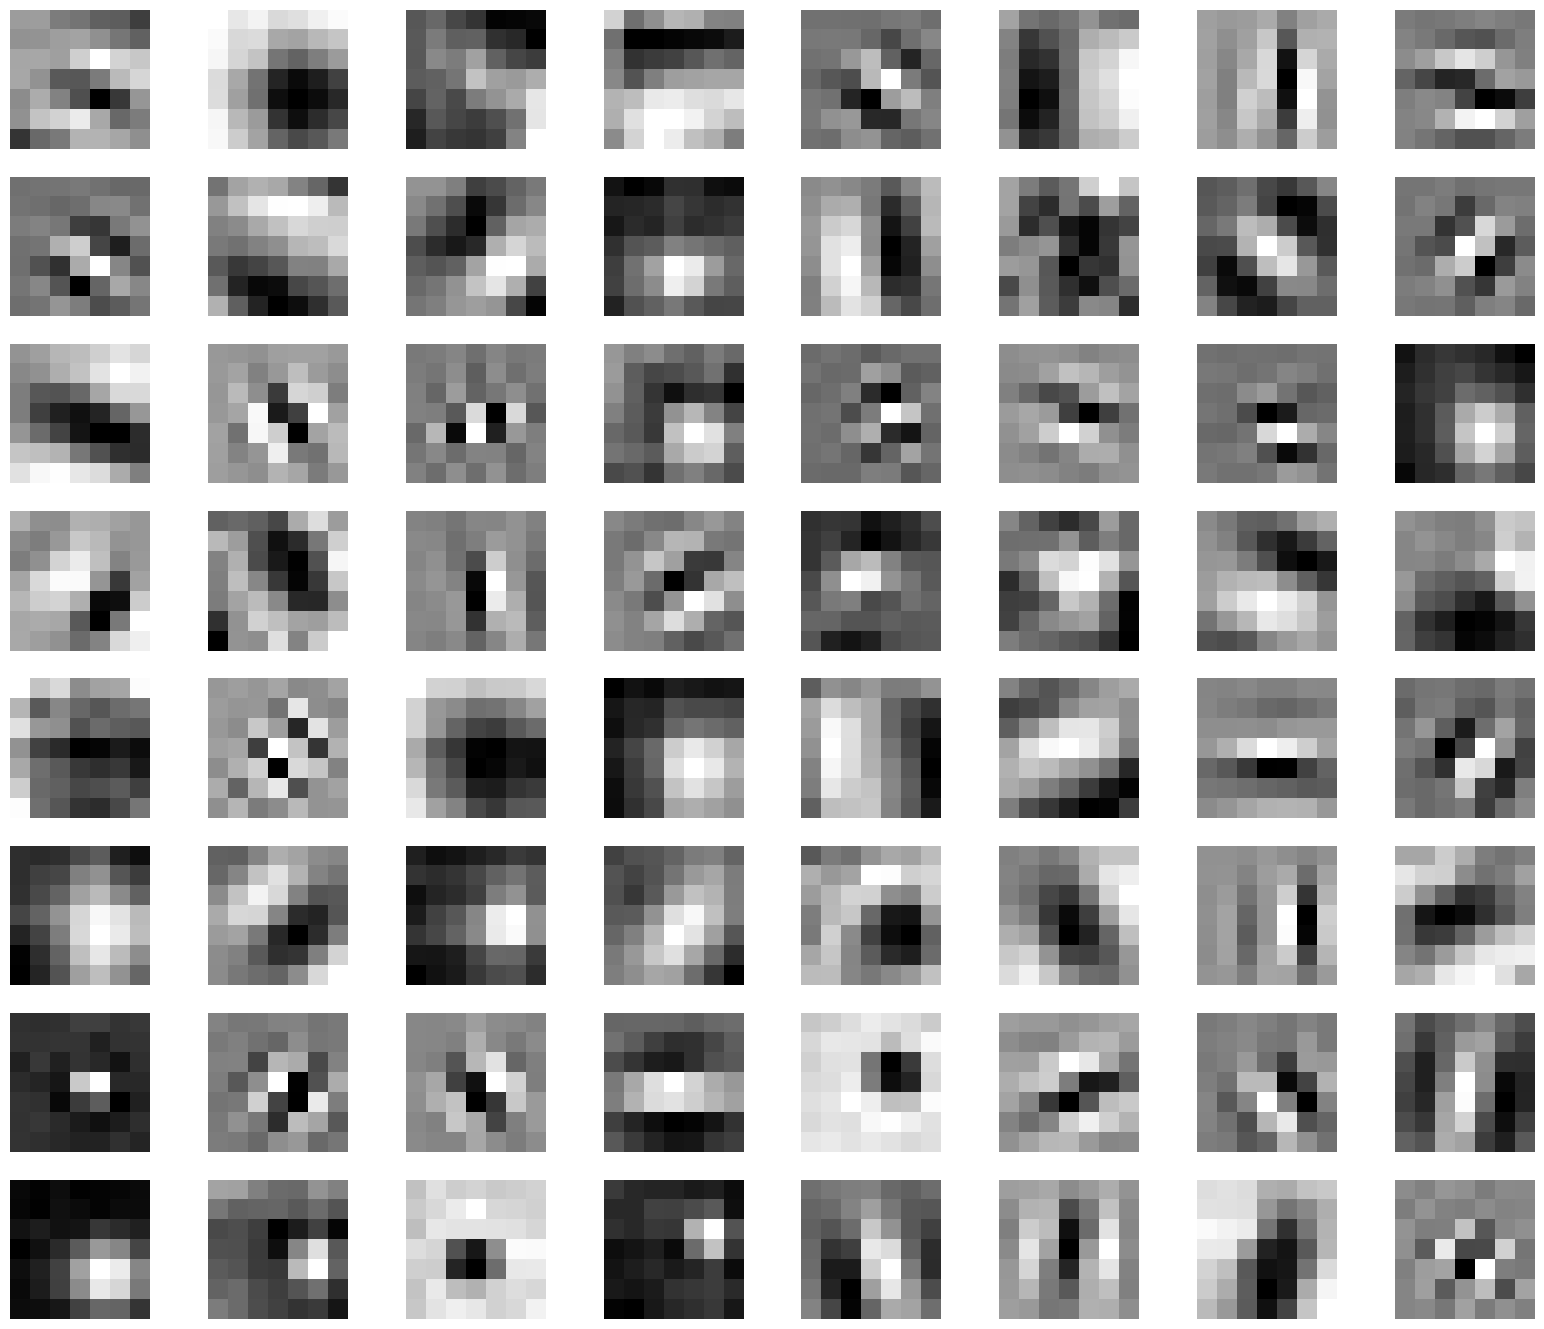

In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import cv2 as cv
import argparse
from torchvision import models, transforms
import torch.nn.functional as F

# load the model
model = models.resnet50(pretrained=True)
#print(model)
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the 49 conv layers in this list
# get all the model children as list
model_children = list(model.children())

# counter to keep count of the conv layers
counter = 0
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

# take a look at the conv layers and the respective weights
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

# visualize the first conv layer filters
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    #plt.savefig('../outputs/filter.png')
plt.show()

####Loading Sample Data
An sample image is loaded using the Image.open() function from the PIL library, and then visualized using the imshow() function from matplotlib.

Next, a series of transformations are defined using the transforms.Compose() function from the torchvision library. These transformations include converting the image to a PIL Image object, resizing it to 512x512, and converting it to a tensor.

The loaded image is converted to a numpy array and then transformed using the defined transformations. The size of the transformed image tensor is printed using the size() method.

Finally, the image tensor is unsqueezed to add a batch dimension, and the new size of the tensor is printed.

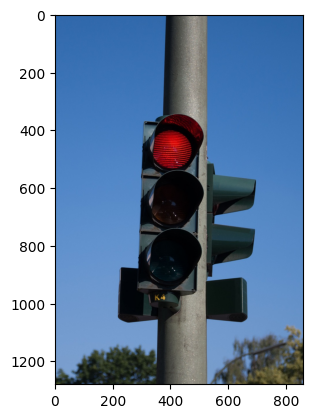

torch.Size([3, 512, 512])
torch.Size([1, 3, 512, 512])


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:03<00:00, 13.3MB/s]


Label Index: 920, Probability: 23.62%


In [12]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torchvision.models as models
import torch

# Load an image
img_path = '/content/drive/MyDrive/Colab Notebooks/images/red_traffic_light_0.jpg'
img = Image.open(img_path)

# Show the image
plt.imshow(img)
plt.show()

# Define the transforms
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
])

# Apply the transforms
img_tensor = transform(img)
print(img_tensor.size())

# Unsqueeze to add a batch dimension
img_tensor = img_tensor.unsqueeze(0)
print(img_tensor.size())

# Define the model
model = models.resnet18(pretrained=True)
model = model.eval()

# Make predictions with the model
outputs = model(img_tensor)
output_probs = F.softmax(outputs, dim=1).squeeze(0)
# Find the index of the maximum value
label_idx = output_probs.argmax()
# Get the corresponding probability
probability = output_probs[label_idx].item() * 100 # converting to percentage
print(f"Label Index: {label_idx}, Probability: {probability:.2f}%")

#### Feature (Layer) Visualization
The sample image is passed through all the convolutional layers of the ResNet50 model that was loaded earlier. The results from each layer are stored in a list called results.

Then, the code visualizes 64 features from each layer. It iterates over the layers in results and extracts the feature maps for that layer. Then, for each feature map, it plots a grayscale image using plt.imshow() and adds it to a subplot in a 8x8 grid using plt.subplot(). This is done for the first 64 feature maps from each layer.

Finally, the code prints a message indicating which layer's feature maps are being visualized, displays the resulting image using plt.show(), and closes the plot using plt.close().

In [ ]:
# Specify the desired layers to visualize
layers_to_visualize = [0, 48]

# pass the image through all the layers
results = [conv_layers[0](img)]
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))
# make a copy of the `results`
outputs = results

# visualize 64 features from each layer
# (although there are more feature maps in the upper layers)
for num_layer in layers_to_visualize:
    plt.figure(figsize=(30, 30))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print(layer_viz.size())
    for i, filter in enumerate(layer_viz):
        if i == 64: # we will visualize only 8x8 blocks from each layer
            break
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")
    print(f"Layer {num_layer} feature maps...")

    plt.show()
    plt.close()

Output hidden; open in https://colab.research.google.com to view.